# Supply Chain Analytics : Data Cleaning

In [2]:
# Import Libraries

import pandas as pd
import numpy as np

In [3]:
# Lets load Raw Data

cycle_raw_data = pd.read_csv(r'C:\Users\saksh\Downloads\CycleData.csv', low_memory=False)
delay_raw_data = pd.read_csv(r'C:\Users\saksh\Downloads\DelayData.csv')
location_raw_data = pd.read_csv(r'C:\Users\saksh\Downloads\LocationData.csv')

In [4]:
# Display Cycle Raw Data

cycle_raw_data.head()


,ASSOCPAYLOADNOMINAL,AT Available Time (iMine),Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Creation Mode,CT Calendar SMU Time,CT Calendar Time,...,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,Crew OID,Job Code Description,Job Code Name,Job Type
0,NaN,737,1.0,737,737,1,737,0,737,737,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
1,NaN,527,1.0,527,527,1,527,0,527,527,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
2,NaN,496,1.0,292,496,1,496,0,264,496,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
3,NaN,714,1.0,420,714,1,714,0,403,714,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
4,NaN,512,1.0,300,512,1,512,0,300,512,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN


#### The Cycle dataset has 47344 rows and 93 columns

In [6]:
cycle_raw_data.shape

(47344, 93)

In [7]:
# Display Delay Raw Data

delay_raw_data.head()


,Delay OID,Description,ECF Class ID,Acknowledge Flag,Acknowledged Flag,Confirmed Flag,Engine Stopped Flag,Field Notification Required Flag,Office Confirm Flag,Production Reporting Only Flag,...,Target Machine is Active Flag,Target Machine Class Name,Target Machine Class Description,Target Machine Class is Active Flag,Target Machine Class Category Name,Delay Reported By Person Name,Delay Reported By User Name,Delay Status Description,Delay Start Timestamp (GMT8),Delay Finish Timestamp (GMT8)
0,10721642969,MACHINE GEN Started a delay: 2110_Operator_Hot...,XAEntity.Delay,N,N,N,N,N,N,Y,...,Y,994H,Wheel Loader,Y,Loader Classes,Daniel Nye,NaN,Historical,2020-07-26 02:04:59,2020-07-26 02:08:41
1,10721643044,6026,XAEntity.Delay,N,N,N,N,Y,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 01:59:06,2020-07-26 02:05:54
2,10721643462,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]],XAEntity.Delay,N,N,N,N,N,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 02:06:13,2020-07-26 02:06:24
3,10721643635,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]] acces...,XAEntity.Delay,N,N,N,N,Y,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 02:06:25,2020-07-26 02:23:48
4,10721645207,5271,XAEntity.Delay,N,N,N,N,Y,N,N,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,Casey Ruck,Historical,2020-07-26 02:09:44,2020-07-26 02:15:00


#### The Delay dataset has 8783 rows and 30 columns

In [9]:
delay_raw_data.shape

(8782, 30)

In [10]:
# Display Location Raw Data

location_raw_data

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552
5,6,DS_W1A2,23.164861,4202.946825
6,7,DS_W2C2_1,23.374642,4043.319503
7,8,DS_W55B,23.378768,4205.860720
8,9,DS_W55B_2,23.371916,4056.194529
9,10,DS_W55D,23.371724,4045.024300


#### The Location dataset has 31 rows and 4 columns 

In [12]:
location_raw_data.shape

(31, 4)

### Step 1 : Clean and Standardize Column Names

In [14]:
# Step 1 : Clean Column Headers

def clean_headers(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
        .str.replace("(", "")
        .str.replace(")", "")
    )
    return df

cycle = clean_headers(cycle_raw_data.copy())
delay = clean_headers(delay_raw_data.copy())
location = clean_headers(location_raw_data.copy())

### Step 2 : Drop Duplicates in datasets

In [16]:
# Step 2 : Now lets Remove Duplicates

cycle.drop_duplicates(inplace=True)
delay.drop_duplicates(inplace=True)
location.drop_duplicates(inplace=True)

### Step 3 : Conversion from timestamps to datetime in datasets

In [18]:
# Step 3 : Parse Dates
# Identify and convert timestamps columns to datetime in cycle and delay dataset

cycle['cycle_start_timestamp_gmt8'] = pd.to_datetime(cycle['cycle_start_timestamp_gmt8'], errors='coerce')
cycle['cycle_end_timestamp_gmt8'] = pd.to_datetime(cycle['cycle_end_timestamp_gmt8'], errors='coerce')
cycle['record_updated_timestamp_gmt8'] = pd.to_datetime(cycle['record_updated_timestamp_gmt8'], errors='coerce')

delay['delay_start_timestamp_gmt8'] = pd.to_datetime(delay['delay_start_timestamp_gmt8'], errors='coerce')
delay['delay_finish_timestamp_gmt8'] = pd.to_datetime(delay['delay_finish_timestamp_gmt8'], errors='coerce')

### Step 4 : Handle Missing Values 

In [20]:
# Step 4: Handle Missing Values
# Drop rows with missing key identifiers

cycle.dropna(subset=['primary_machine_name', 'source_location_name', 'destination_location_name'], inplace=True)
delay.dropna(subset=['target_machine_name', 'delay_class_name'], inplace=True)
location.dropna(subset=['location_id', 'name'], inplace=True)


#### Filling NaNs with 0 for numeric and "Unknown" for others

In [22]:
# Fill numeric NaN (for durations, payloads, fuel, etc.) with 0

cycle_num_cols = cycle.select_dtypes(include=[np.number]).columns
cycle[cycle_num_cols] = cycle[cycle_num_cols].fillna(0)

delay_num_cols = delay.select_dtypes(include=[np.number]).columns
delay[delay_num_cols] = delay[delay_num_cols].fillna(0)

In [23]:
# Fill remaining NaNs with sensible defaults

cycle = cycle.fillna("Unknown")
delay = delay.fillna("Unknown")
location = location.fillna("Unknown")

#### Conversion of latitude and longitude values to numeric

In [25]:
# For Location Data, convert latitude and longitude to numeric value

for col in ["latitude", "longitude"]:
    if col in location.columns:
        location[col] = pd.to_numeric(location[col], errors="coerce")


### Step 5 : Remove Outliers

In [27]:
# Step 5: Remove Outliers (negative durations, impossible payloads, etc.)

# Cycle data: negative durations or payloads are invalid

duration_cols = [col for col in cycle.columns if "duration" in col or "time" in col]

for col in duration_cols:
    if col in cycle.columns and pd.api.types.is_numeric_dtype(cycle[col]):
        cycle = cycle[cycle[col] >= 0]

##### Removing bad payloads and extreme durations in Cycle 

In [29]:
# remove bad payload values
if "assocpayloadnominal" in cycle.columns:
    cycle = cycle[(cycle["assocpayloadnominal"] >= 0) & (cycle["assocpayloadnominal"] <= 500)]

# remove cycles with extreme duration (>24h)
if "completedcycleduration" in cycle.columns:
    cycle = cycle[cycle["completedcycleduration"] <= 86400]

In [30]:
# Payload sanity check: remove payload if > 1000 tons (unlikely for trucks)

if 'payload_t' in cycle.columns:
    cycle = cycle[(cycle['payload_t'] >= 0) & (cycle['payload_t'] <= 1000)]

##### Removing negative durations in Delay 

In [32]:
# Delay data: remove if finish < start

delay = delay[(delay['delay_finish_timestamp_gmt8'] >= delay['delay_start_timestamp_gmt8']) | delay['delay_finish_timestamp_gmt8'].isna()]

#### Plotting some columns of Cycle Data for Outlier Detection.

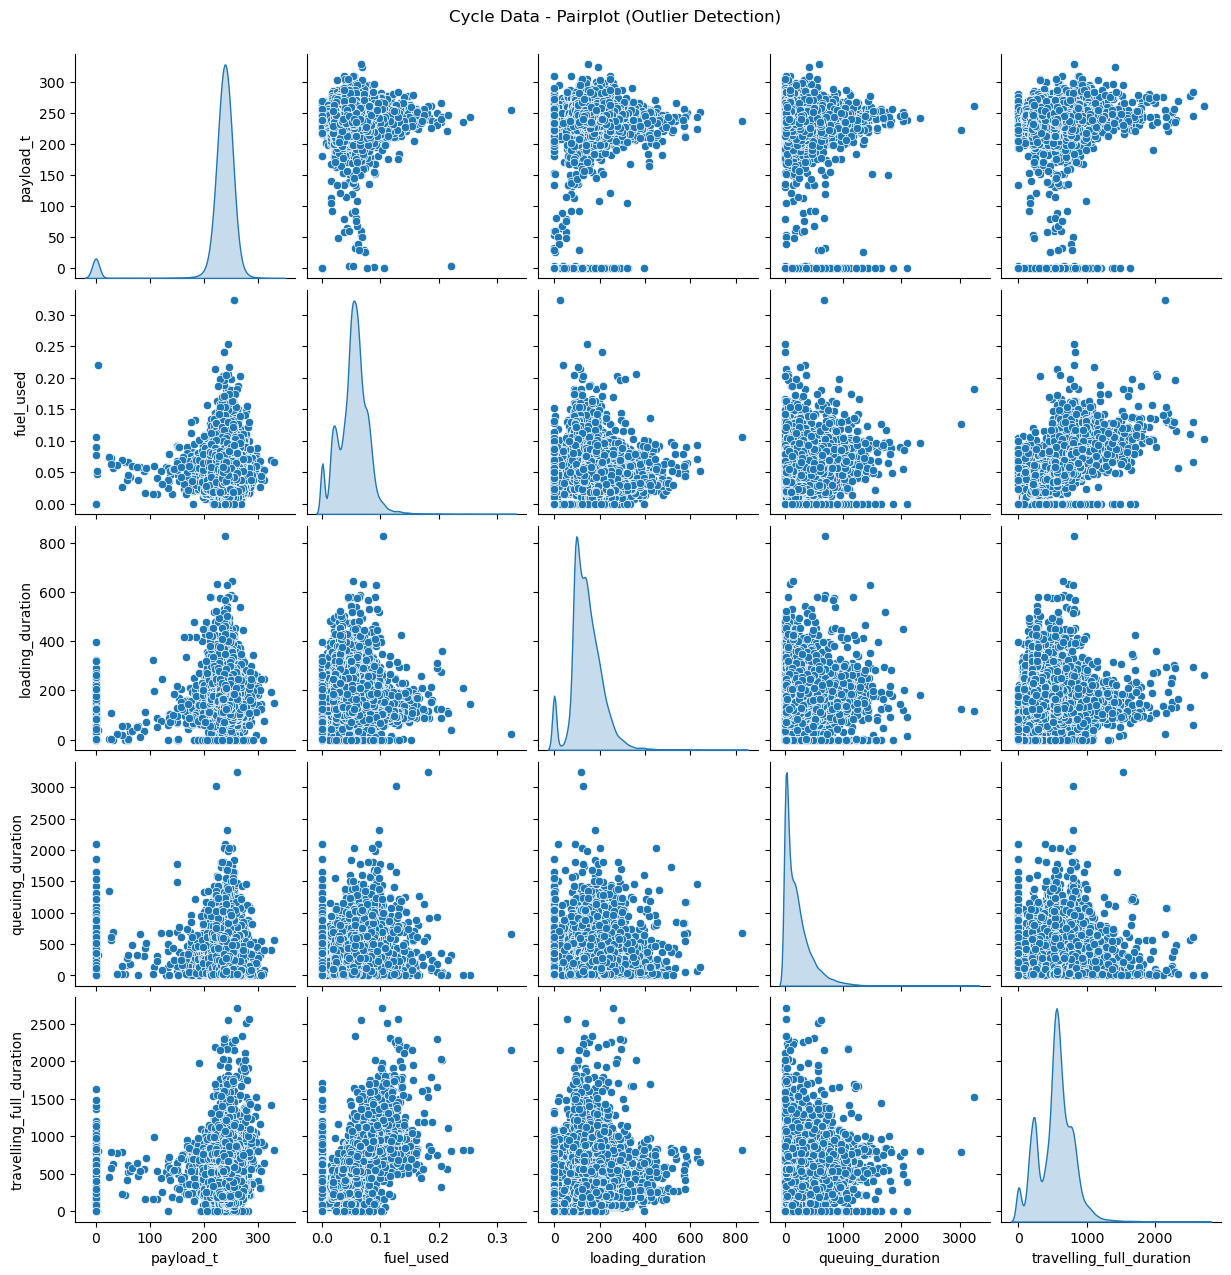

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

cycle_sub = cycle[['payload_t', 'fuel_used', 'loading_duration', 'queuing_duration', 'travelling_full_duration']]

sns.pairplot(cycle_sub, diag_kind="kde")
plt.suptitle("Cycle Data - Pairplot (Outlier Detection)", y=1.02)
plt.show()

### Finally Save Cleaned data to new CSV files

In [36]:
# Save Cleaned Datasets

cycle.to_csv(r"C:\Users\saksh\Documents\Capstone Project - Supply Chain Analytics\Cycle_cleaned_data.csv", index=False)
delay.to_csv(r"C:\Users\saksh\Documents\Capstone Project - Supply Chain Analytics\Delay_cleaned_data.csv", index=False)
location.to_csv(r"C:\Users\saksh\Documents\Capstone Project - Supply Chain Analytics\Location_cleaned_data.csv", index=False)

In [64]:
# Final shape of cycle, delay and location dataset

cycle.shape


(22555, 93)

In [66]:
delay.shape


(8782, 30)

In [68]:
location.shape

(31, 4)